# \[Week2] 머신러닝 기초

## 1. 머신러닝 기본 용어 정리
[강의링크](https://edu.goorm.io/learn/lecture/4012/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%8A%B5)
04.머신러닝2(오버피팅언더피팅 극복하기 ~ ) 수강하시면 됩니다.  
당연히 그냥 구글링하셔도 됩니다.  
\*각 용어 정리는 본인이 추후에 보기 편한 방법으로 자유롭게 하시면 됩니다.  
참고) 소수점 셋째자리 아래는 버림하셔도 됩니다.

### overfitting & underfitting

1. 오버피팅(overfitting)이란?  
    → 현재 데이터(existing data)로는 잘 작동하지만, 새로운 데이터(new data)로는 잘 작동하지 않는 경우
    
    high variance models (∵ complex and represent all the features of the traising set very well)
    
    _학습데이터에 대해서는 오차가 감소하지만 실제 데이터에 대해서는 오차가 증가하는 경우_
    _(decision boundary를 기준으로 False에 몰려있는 경우)_

2. 언더피팅(underfitting)이란?  
    → high bias models (∵ simple and can generalize some features to the unseen data)
    
    bias: 실제 값에서 얼마나 멀리 떨어져 있는가<br>
    variance: 예측 값끼리 서로 얼마나 멀리 떨어져 있는가

3. underfitting 막는 방법 2가지  
    - Find more features
    - Try high variance machine learning models (Decision Tree, K-NN, SVM)

4. overfitting 판단 방법  
→ 학습 데이터로는 잘 작동하지만, 새로운 데이터로는 잘 작동하지 않는 경우

5. overfitting 막는 방법  
    - Cross validation <br> 
    _if validation accuracy is lower, do regularization!_
    - Regularization <br>
        : Let model simpler by giving more bias and less variance <br>
        _Repeat until no overfitting_
    - Add more data as much as possible
    <br><br>
    Cf. Cost Function with Regularization <br>
    $J(\theta) = \frac{1}{2m}  \sum_{i=1}^m (h_\theta(x^i)-y^i)^2 
    + \lambda \sum_{i=1}^n \lvert \theta_i \rvert$
    <br>
    ($\lambda$ = learning rate) <br>
    too small learning rate → overfitting <br>
    too big learning rate → underfitting

### Norm  
<br>
a norm is a function that assigns a strictly positive length or size to each vector in a vector space

1. Norm 수식   
$L_p = (\sum_{i=1}^n \lvert x_i \rvert^p)^\frac{1}{p}$

2. L1 Norm 수식    
$L_1 = (\sum_{i=1}^n \lvert x_i \rvert)$
<br><br>
Cf. L1 Norm in Computer Science
    - L1 Regularization <br>
    - Computer Vision

3. L2 Norm 수식  
$L_p = (\sum_{i=1}^n \lvert x_i \rvert^2)^\frac{1}{2}$
<br><br>
Cf.Pythagoras theorm

4. L2 Norm이 사용되는 Machine Learning 알고리즘   
    - kNN algorithm
    - kmean algorithm

_source code in github_ <br>
https://github.com/minsuk-heo/python_tutorial

### PCA 차원 축소
Principal Component Analysis Reduce Dimension **(RE)**

### Confusion Matrix (혼동 행렬)  
![image](https://user-images.githubusercontent.com/45345120/94503235-f23a4680-0240-11eb-9fae-86768d58ff58.png)

1. Confusion matrix 그리기

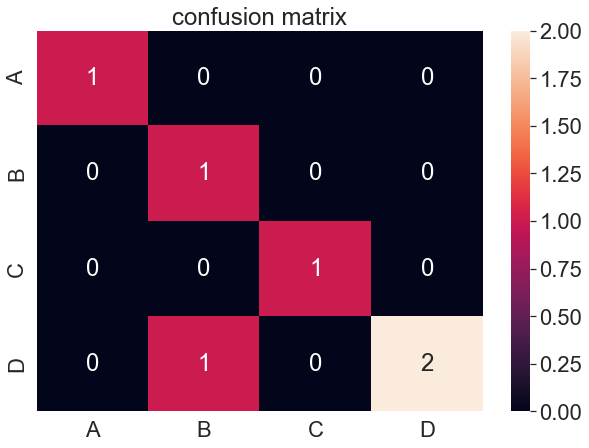

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)
array = ([1,0,0,0], [0,1,0,0], [0,0,1,0], [0,1,0,2])
df_cm = pd.DataFrame(array, index=["A","B","C","D"],
                        columns=["A","B","C","D"])
plt.figure(figsize=(10,7))
plt.title('confusion matrix')
sns.heatmap(df_cm, annot=True)

2. Confusion Matrix with normalization

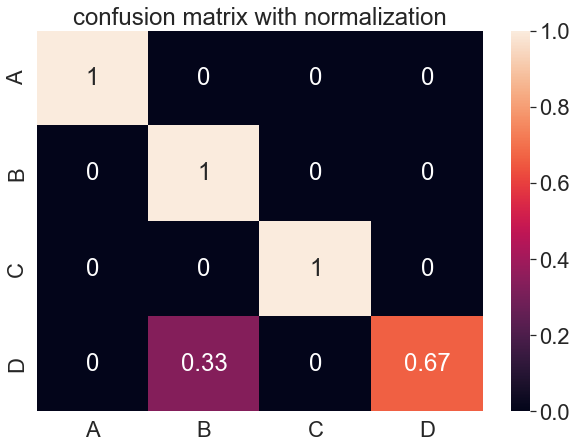

In [18]:
import numpy as np
total = np.sum(array, axis = 1)
array = array / total[:, None]
df_cm = pd.DataFrame(array, index=["A","B","C","D"],
                        columns=["A","B","C","D"])
plt.figure(figsize=(10,7))
plt.title('confusion matrix with normalization')
sns.heatmap(df_cm, annot=True)

### 다중 분류 모델 성능 평가  
![image](https://user-images.githubusercontent.com/45345120/94510085-dc348200-0250-11eb-95fd-0f678b6f9e70.png)   
위의 표를 보고 모델 성능을 측정해봅시다. (소수점 셋째자리에서 반올림)

0. **A의** (1)TP(True Positive), (2)TN(True Negative), (3)FP, (4)FN 을 각각 구하시오.  
    (1) 9
    (2) 64
    (3) 6
    (4) 1

1. Accuracy  <br><br>
$Accuracy = \frac{TP}{TP+TN+FP+FN}$ <hr>
$\frac{9+15+24+15}{80}$ <br>
$∴Accuracy = 0.78$

&nbsp;&nbsp;&nbsp;&nbsp; if data is balanced, consider accuracy!<br>
&nbsp;&nbsp;&nbsp;&nbsp; if data is imbalanced, consider f1 score!<br>

2. Average Precision  <br><br>
$Precision = \frac{TP}{TP+FP}$  &nbsp; : 해당 class의 actual values (column) 확인 <br>
$Average Precision = \frac{P(A)+P(B)+P(C)+P(D)}{4}$ (4: the number of classes)
<hr>
$P(A) = \frac{9}{15} P(B) = \frac{15}{20} P(C) = \frac{24}{28} P(D) = \frac{15}{17}$
<br>

    $∴Average Precision = 0.77$

3. Average Recall  <br><br>
$Average Recall = \frac{TP}{TP+FN}$  &nbsp; : 해당 class의 predictions (row) 확인 
$Average Recall = \frac{R(A)+R(B)+R(C)+R(D)}{4}$ (4: the number of classes)
<hr>
$R(A) = \frac{9}{10} R(B) = \frac{15}{20} R(C) = \frac{24}{30} R(D) = \frac{15}{20}$
<br> 

    $∴ Average Recall = 0.8$

4. f1 score  
$f1 score = 2 X \frac{Precision X Recall}{Precision + Recall}$ <hr>
$2 X \frac{0.77 X 0.8}{0.77 + 0.8}$ <br>

    $∴f1 score = 0.79$

## 2. 머신러닝 알고리즘 - 알고리즘 2개\[필수] 선택해서 작성 (다 하셔도 됩니다!)   
### 선택한 알고리즘 옆에 **❄**를 붙여주세요.  
사진을 추가해도 되고 자유 형식입니다.
[강의링크](https://edu.goorm.io/learn/lecture/4012/%2525EB%2525A8%2525B8%2525EC%25258B%2525A0%2525EB%25259F%2525AC%2525EB%25258B%25259D-%2525EC%25259D%2525B4%2525EB%2525A1%2525A0-%2525EB%2525B0%25258F-%2525ED%25258C%25258C%2525EC%25259D%2525B4%2525EC%25258D%2525AC-%2525EC%25258B%2525A4%2525EC%25258A%2525B5#) (머신러닝1, 머신러닝2-kmeans)

### 1. KNN(k-Nearest Neighbors) **❄**

1. KNN 알고리즘
K - Neareast Neighbors 최근접 이웃 알고리즘

    - 지도 학습 (Supervised Learning)
        - 분류(Classification)와 회귀(Regression)가 모두 가능
    <br><br>
    - 새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 k개 이웃의 정보로 새로운 데이터를 예측
    <br><br>
    - 거리를 측정할 때는 주로 유클리디안 거리 계산법(<-피타고라스 정리)을 사용


In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# iris data 로드
iris = load_iris()

# data split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = 0.3, random_state = 0)

# classifier 객체 생성
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
# n_neighbors는 가장 가까운 이웃 개수
# n_jobs는 사용할 코어의 개수 (-1이면 모든 코어 사용)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)    # knn 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(knn.score(x_test, y_test)))

results의 처음 6개 ==> ['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica']
score 메소드 이용 ==> 0.933


### 2. Decision Tree **❄**

1. Decision Tree 알고리즘
    의사 결정 트리

    - 지도 학습 (Supervised Learning)
        - 분류(Classification)와 회귀(Regression)가 모두 가능
    <br><br>
    
    - 특정 기준(질문)에 따라 데이터를 구분하는 모델
    <br><br>
    1-1) Define Problem <br>
    1-2) Collect training Data
    <br><br>
    2-1) Extract Data <br>
    2-2) Build a tree
    <br><br>
    3) Deploy machine
    <br><br>
    4) Test with test data

2. 
    <br>
    (1) Entropy 
    
    불순도(Impurity): 해당 범주 안에 서로 다른 데이터가 얼마나 섞여있는지를 뜻함
    
    Entropy: 불순도를 수치적으로 나타낸 척도 <br>

      $Entropy = -p(+)*\log((p(+)) - p(-) * \log(p(-))$
      
   <br> 
   (2) Information Gain
   
   정보획득: 분기 이전의 엔트로피에서 분기 이후의 엔트로피를 뺀 수치
   
   Information gain = entropy(parent) - [weighted averge] entropy(children)
   
   **결정 트리 알고리즘은 정보 획득을 최대화하는 방향으로 학습 진행**

3. Information Gain 구하기  
<table>
    <thead>
        <th>ID</th>
        <th>Cartoon</th>
        <th>WinterFamilyPhoto</th>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>No</td>
            <td>Yes</td>
        </tr>
        <tr>
            <td>2</td>
            <td>Yes</td>
            <td>No</td>
        </tr>
        <tr>
            <td>3</td>
            <td>Yes</td>
            <td>No</td>
        </tr>
        <tr>
            <td>4</td>
            <td>No</td>
            <td>No</td>
        </tr>
    </tbody>
</table>

(1) 위의 표 상황에서의 Entropy 구하기 <br><br>
Total 4 photos <br>
1 photo: winter family photo <br>
3 photos: not winter family photo <br>
<br>
E(WinterFamilyPhoto) <br>
= Entropy([1+, 3-]) <br>
= -(1/4)*log(1/4) - (3/4)*log(3/4) <br>
= 0.244
<br><br>
(2) Cartoon 기준으로 나눴을 때, Information gain 구하기 <br><br>
IG(WinterFamilyPhoto, Cartoon) <br>
= E(WinterFamilyPhoto) - E(WinterFamilyPhoto, Cartoon) <br>
= 0.244 - (2/4 * E([0+, 2-]) + 2/4 * E([1+, 1-])) <br>
= 0.094

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 0)
# classifier 객체 생성
decision_tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)
# max_depth 는 트리의 최대 깊이
# default = None 
# -> 완벽하게 클래스 값이 결정되거나 데이터 개수가 min_samples_split 보다 작아질 때까지 분할
decision_tree.fit(x_train, y_train)
r = export_text(decision_tree)         # export_text 함수를 이용해 decision_tree 출력
print(r)

prediction = decision_tree.predict(x_test)
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(decision_tree.score(x_test, y_test)))

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- class: 2

results의 처음 6개 ==> ['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica']
score 메소드 이용 ==> 0.911


### 3. Naive Bayes

1. 조건부 확률   
\[답변]

2. 베이즈 정리  
\[답변]

3. 확률 계산  
<table>
    <thead>
        <th>Index</th>
        <th>Email</th>
        <th>Spam</th>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>I got <strong>free</strong> two movie ticket from your boy friend</td>
            <td>False</td>
        </tr>
        <tr>
            <td>2</td>
            <td><strong>free</strong> coupon from xx.com</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>3</td>
            <td>watch <strong>free</strong> new movie from freemovie.com</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>4</td>
            <td>Best deal, promo code here</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>5</td>
            <td>There will be <strong>free</strong> pizza today 2pm meeting - your boss</td>
            <td>False</td>
        </tr>
        <tr>
            <td>6</td>
            <td>Scheduled meeting tomorrow</td>
            <td>False</td>
        </tr>
        <tr>
            <td>7</td>
            <td>Can we have lunch today?</td>
            <td>False</td>
        </tr>
        <tr>
            <td>8</td>
            <td>I miss you</td>
            <td>False</td>
        </tr>
        <tr>
            <td>9</td>
            <td>thanks my friend</td>
            <td>False</td>
        </tr>
        <tr>
            <td>10</td>
            <td>It was good to see you today</td>
            <td>False</td>
        </tr>
    </tbody>
</table>

(1) Spam 메일일 확률    
\[답변] P(Spam) =


(2) 메일에 "free" 단어가 포함되어 있을 확률  
\[답변] P("free") = 

(3) 스팸 메일에 "free" 단어가 포함되어 있을 확률   
\[답변] P("free" | Spam) = 

(4) 메일에 "free" 단어가 포함되어 있을 경우 이 메일이 스팸일 확률  
\[답변] P(Spam | "free") = 

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
gnb = pass
gnb.pass         # x_train, y_train 이용해 트레이닝

prediction = gnb.pass       # gnb 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(gnb.pass))        # x_test, y_test를 이용해 정확도 측정  

### 4. SVM (Support Vector Machine)

1. SVM 알고리즘 정리  
\[답변]

2. SVM 파라미터 2가지  
\[답변] 

3. Grid Search 정리  
\[답변]

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
svc = pass
svc.pass            # x_train, y_train 이용해 트레이닝

prediction = svc.pass       # svc 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(svc.pass))          # x_test, y_test를 이용해 정확도 측정

### 5. Linear Regression

1. Classification VS Regression  
\[답변] 

3. Mean Square Error 란?  
\[답변] 

4. Error = h(x) - y 일 때 Mean Square Error   
\[답변] Mean Square Error = 

5. Gradient Descent 정리  
\[답변]

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
# 이 예제에서는 sepal length를 예측해봅시다.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Iris Data
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)        
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
# Converting Objects to Numerical dtype
iris_df = pd.concat([iris_df, target_df], axis= 1)

iris_df

In [ ]:
from sklearn.linear_model import LinearRegression
x = iris_df.pass        # 'sepal length (cm)' column drop
y = iris_df['sepal length (cm)']    
# data split
x_train, x_test, y_train, y_test = pass    # test_size=0.3 / random_state=0
# classifier 객체 생성
lr = pass
lr.pass         # x_train, y_train 이용해 트레이닝

prediction = lr.pass           # lr 이용해 x_test 예측 
print('실제 값의 처음 6개 ==> {}'.format(y_test.values[:6]))
print('results의 처음 6개 ==> {}'.format(prediction[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(lr.pass))       # x_test, y_test를 이용해 정확도 측정

### 6. Logistic Regression

1. Linear regression VS Logistic Regression  
\[답변] 

2. Sigmoid Function 정리  
\[답변]

3. Cost function?  
\[답변] 

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
lr = pass
lr.pass             # x_train, y_train 이용해 트레이닝

prediction = lr.pass           # lr 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(lr.pass))       # x_test, y_test를 이용해 정확도 측정

### 7. 랜덤 포레스트 Random Forest

1. Random Forest 알고리즘 정리  
\[답변]

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
clf = pass       # max_depth = 2 / random_state = 0
# max_depth 의미? [답변]
clf.pass         # x_train, y_train 이용해 트레이닝

prediction = clf.pass           # clf 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(clf.pass))          # x_test, y_test를 이용해 정확도 측정

### 8. 앙상블

1. Ensemble 기법 정리  
\[답변]

2. hard voting VS soft voting  
\[답변] 

### 9. kmean 클러스터링

1. k-mean 알고리즘 단계 - 추가 및 제거 가능  
(1)
<br>
(2)
<br>
(3)
<br>
(4)
<br>
(5)
<br>
(6)
<br>

2. clustering이 끝났다고 판단되는 경우?  
\[답변]

3. 초기 centroid 결정하는 방법 3가지와 그에 대한 설명  
\[답변(1)]
<br>
\[답변(2)] 
<br>
\[답변(3)]


4. KMeans 사용해보기

In [ ]:
# 필요한 패키지 import
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create data points
array = [[3,1], [4,1], [3,2], [4,2],
         [10,5], [10,6], [11,5], [11,6],
         [15,1], [15,2], [16,1], [16,2]]
df = pd.DataFrame(array, columns=['x', 'y'])

# convert dataframe to numpy array
data_points = df.values
kmeans = pass    # cluster 개수 = 3 으로 KMeans clustering
df['cluster_id'] = pass # clustering된 각 점의 cluster 번호 저장

# Visualize data point
sns.lmplot('x', 'y', data=df, fit_reg=False,                    
            scatter_kws={"s": 200},
            hue="cluster_id")
plt.title("kmean plot")
plt.xlabel("x")
plt.ylabel("y")
